Ice     280
Dry     258
Snow    232
Wet     230
Name: RoadCondition, dtype: int64
Clear    267
Rain     263
Snow     259
Fog      211
Name: Weather, dtype: int64
Morning      261
Afternoon    258
Night        241
Evening      240
Name: TimeOfDay, dtype: int64


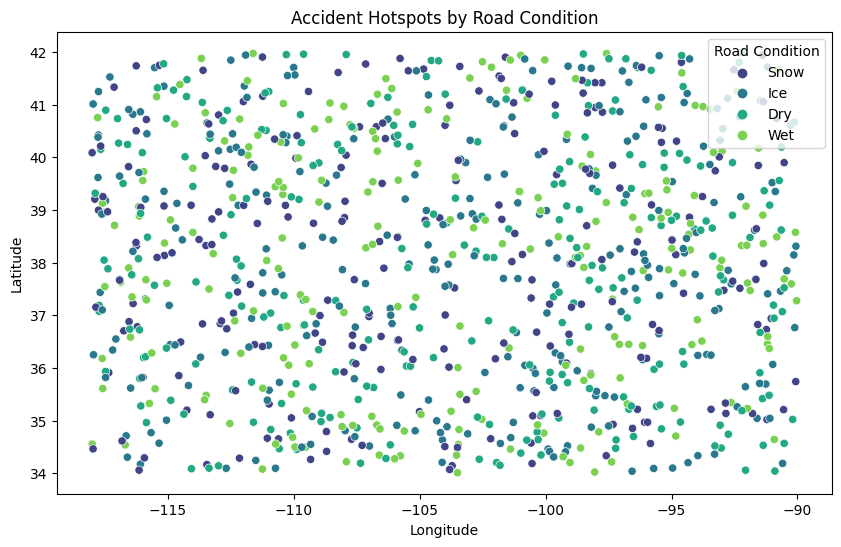

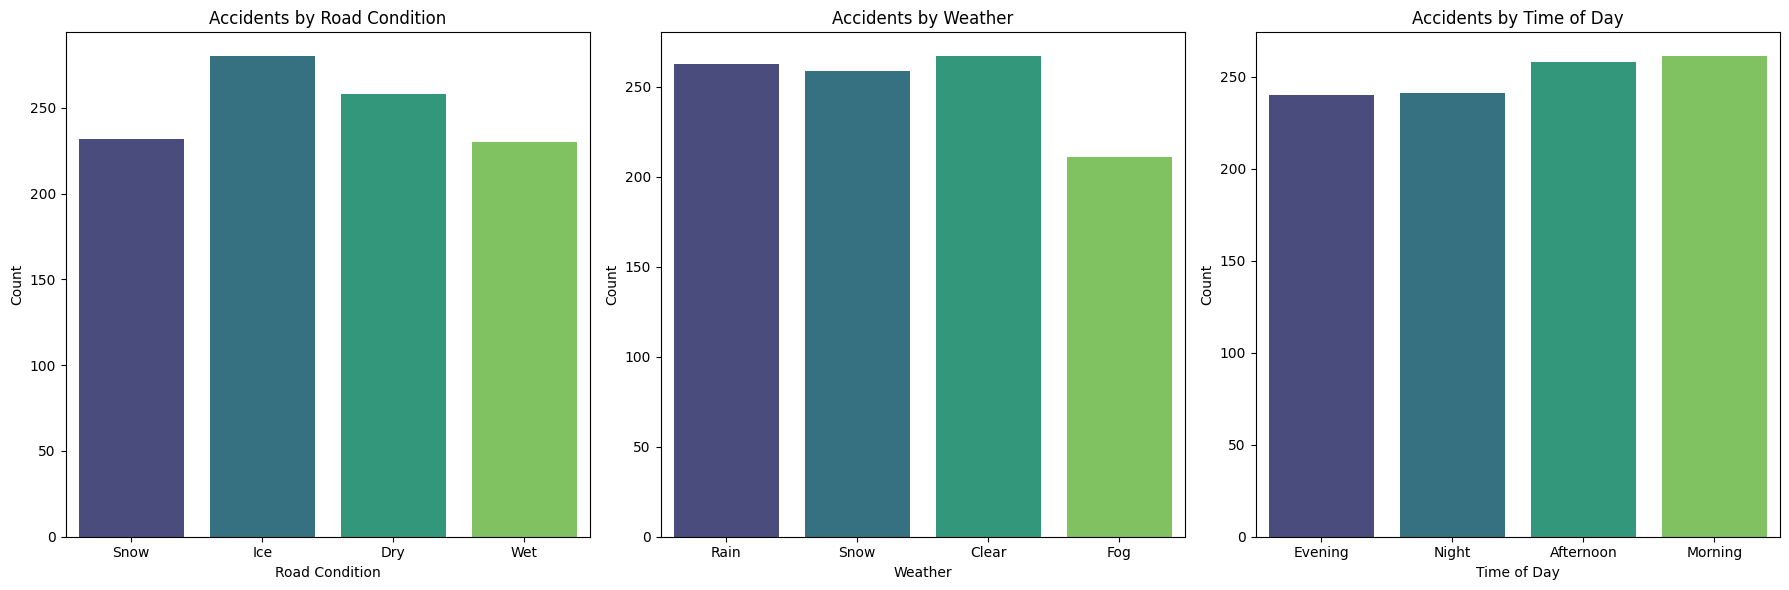

Weather    Clear  Fog  Rain  Snow
TimeOfDay                        
Afternoon     65   54    67    72
Evening       64   49    68    59
Morning       71   60    60    70
Night         67   48    68    58


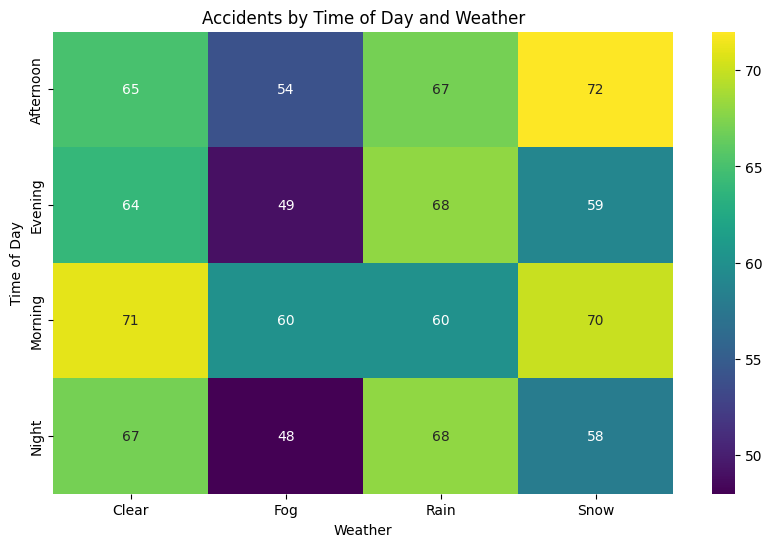

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a synthetic dataset
np.random.seed(42)

n_samples = 1000
data = {
    'AccidentID': np.arange(1, n_samples + 1),
    'Date': pd.date_range(start='2023-01-01', periods=n_samples, freq='H'),
    'RoadCondition': np.random.choice(['Dry', 'Wet', 'Snow', 'Ice'], size=n_samples),
    'Weather': np.random.choice(['Clear', 'Rain', 'Snow', 'Fog'], size=n_samples),
    'TimeOfDay': np.random.choice(['Morning', 'Afternoon', 'Evening', 'Night'], size=n_samples),
    'Latitude': np.random.uniform(low=34.0, high=42.0, size=n_samples),
    'Longitude': np.random.uniform(low=-118.0, high=-90.0, size=n_samples),
}

df_accidents = pd.DataFrame(data)

# Analyze patterns related to road conditions
road_condition_counts = df_accidents['RoadCondition'].value_counts()
print(road_condition_counts)

# Analyze patterns related to weather
weather_counts = df_accidents['Weather'].value_counts()
print(weather_counts)

# Analyze patterns related to time of day
time_of_day_counts = df_accidents['TimeOfDay'].value_counts()
print(time_of_day_counts)

# Visualize accident hotspots
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_accidents, x='Longitude', y='Latitude', hue='RoadCondition', palette='viridis')
plt.title('Accident Hotspots by Road Condition')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Road Condition')
plt.show()

# Visualize contributing factors
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.countplot(data=df_accidents, x='RoadCondition', ax=axes[0], palette='viridis')
axes[0].set_title('Accidents by Road Condition')
axes[0].set_xlabel('Road Condition')
axes[0].set_ylabel('Count')

sns.countplot(data=df_accidents, x='Weather', ax=axes[1], palette='viridis')
axes[1].set_title('Accidents by Weather')
axes[1].set_xlabel('Weather')
axes[1].set_ylabel('Count')

sns.countplot(data=df_accidents, x='TimeOfDay', ax=axes[2], palette='viridis')
axes[2].set_title('Accidents by Time of Day')
axes[2].set_xlabel('Time of Day')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Additional analysis
accidents_by_time_and_weather = df_accidents.groupby(['TimeOfDay', 'Weather']).size().unstack().fillna(0)
print(accidents_by_time_and_weather)

plt.figure(figsize=(10, 6))
sns.heatmap(accidents_by_time_and_weather, annot=True, fmt='g', cmap='viridis')
plt.title('Accidents by Time of Day and Weather')
plt.xlabel('Weather')
plt.ylabel('Time of Day')
plt.show()
